Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN skin cancer detection/Test")
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN skin cancer detection/Train")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2241
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2241 files belonging to 9 classes.
Using 1793 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2241 files belonging to 9 classes.
Using 448 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

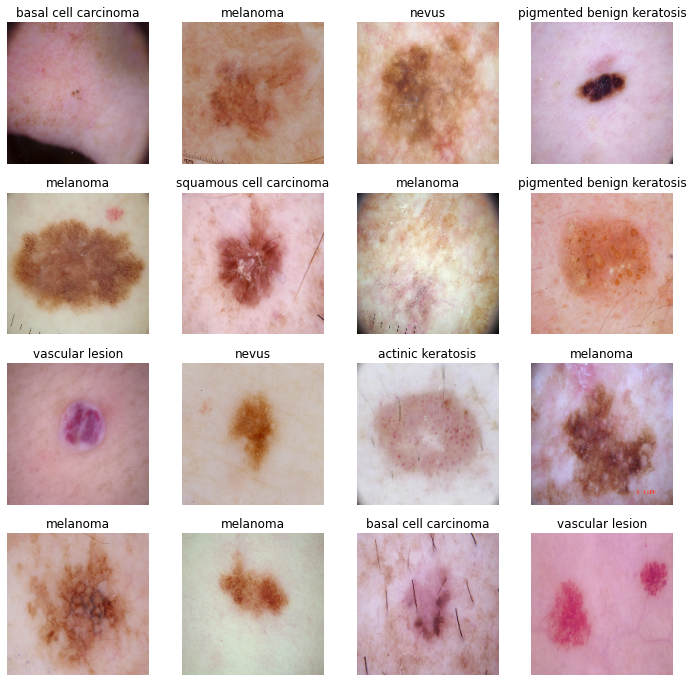

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Create a method to show images
def showImg(data_path, classes):
  plt.figure(figsize=(12, 12))
  for i, l in data_path.take(1):
    for j in range(16):
      plt.subplot(4, 4, j+1)
      plt.imshow(i[j].numpy().astype("int64"))
      plt.title(classes[l[j]])
      plt.axis("off")

showImg(train_ds, class_names)

# Checking if the shape is (32, 180, 180, 3) for image_batch and (32, ) for label_batch
# for i,j in train_ds:
#   print(i.shape, j.shape)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here

# Normalization
def normalizePxl(dataset):
  normalize = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
  nds = dataset.map(lambda x, y: (normalize(x), y))
  image_batch, labels_batch = next(iter(nds))
  if 0 <= np.min(image_batch[0]) <= 1 and 0 <= np.max(image_batch[0]) <= 1:
    print("Normalization Successful")
  else:
    print("Normalization Failed")


normalizePxl(train_ds)

Normalization Successful


In [1]:
normalizePxl(val_ds)

NameError: ignored

In [ ]:
# Model Training

num_classes = 9

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 13s 155ms/step - loss: 34.4984 - accuracy: 0.3090 - val_loss: 42.9429 - val_accuracy: 0.1964
Epoch 2/20
57/57 [==============================] - 6s 105ms/step - loss: 14.1065 - accuracy: 0.3519 - val_loss: 10.7538 - val_accuracy: 0.2277
Epoch 3/20
57/57 [==============================] - 6s 106ms/step - loss: 6.9226 - accuracy: 0.4540 - val_loss: 5.2715 - val_accuracy: 0.2879
Epoch 4/20
57/57 [==============================] - 6s 107ms/step - loss: 3.9288 - accuracy: 0.4791 - val_loss: 3.3345 - val_accuracy: 0.4375
Epoch 5/20
57/57 [==============================] - 6s 107ms/step - loss: 2.5210 - accuracy: 0.5466 - val_loss: 2.4641 - val_accuracy: 0.4621
Epoch 6/20
57/57 [==============================] - 6s 107ms/step - loss: 1.9568 - accuracy: 0.5828 - val_loss: 2.0441 - val_accuracy: 0.5089
Epoch 7/20
57/57 [==============================] - 6s 107ms/step - loss: 1.7530 - accuracy: 0.5895 - val_loss: 2.0361 - val_accuracy: 0.5268
E

### Visualizing training results

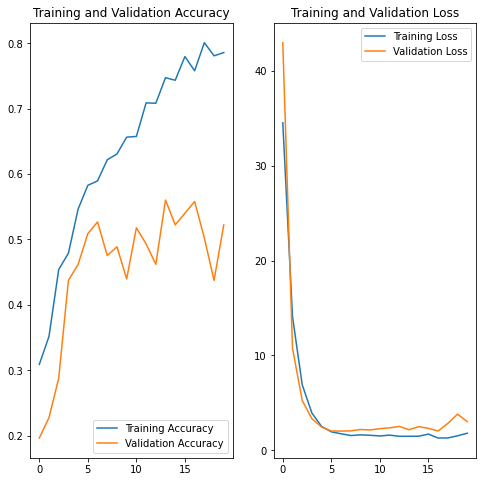

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
#@markdown The training accuracy and the validation accuracy are far diverse as shown above in the plotted graph. The training accuracy is much higher i.e ~78% and the validation accuracy is around ~52% which is much lower. So, we can say that there is **"overfitting"** happened in this model.

#@markdown So, we can make the model a bit more robust by add a dropout layer and then check if the validation accuracy improves.



In [40]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

img_instance = data_dir_train / class_names[0]
img_sample = list(img_instance.glob('*'))
PIL.Image.open(str(img_sample[0]))

# Implementing Augmentation for one image
!pip install Augmentor

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(img_instance)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # p.sample(1) 
    # disable the above comment to get a sample of how the augmentation works

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN skin cancer detection/Train/actinic keratosis/output.Initia

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape = (img_height, img_width, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512,kernel_regularizer=l2(0.01)))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

### Compiling the model

In [ ]:
## Your code goes here
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 7s 110ms/step - loss: 44.3661 - accuracy: 0.2370 - val_loss: 31.5043 - val_accuracy: 0.1786
Epoch 2/20
57/57 [==============================] - 6s 108ms/step - loss: 20.3425 - accuracy: 0.2738 - val_loss: 15.3040 - val_accuracy: 0.2812
Epoch 3/20
57/57 [==============================] - 6s 108ms/step - loss: 12.4294 - accuracy: 0.3391 - val_loss: 9.9631 - val_accuracy: 0.2634
Epoch 4/20
57/57 [==============================] - 6s 109ms/step - loss: 8.3120 - accuracy: 0.3296 - val_loss: 6.9097 - val_accuracy: 0.3549
Epoch 5/20
57/57 [==============================] - 6s 109ms/step - loss: 5.9202 - accuracy: 0.3397 - val_loss: 5.0703 - val_accuracy: 0.3728
Epoch 6/20
57/57 [==============================] - 6s 109ms/step - loss: 4.5760 - accuracy: 0.3397 - val_loss: 4.0341 - val_accuracy: 0.3862
Epoch 7/20
57/57 [==============================] - 6s 109ms/step - loss: 3.7217 - accuracy: 0.3430 - val_loss: 3.3459 - val_accuracy: 0.4286
E

### Visualizing the results

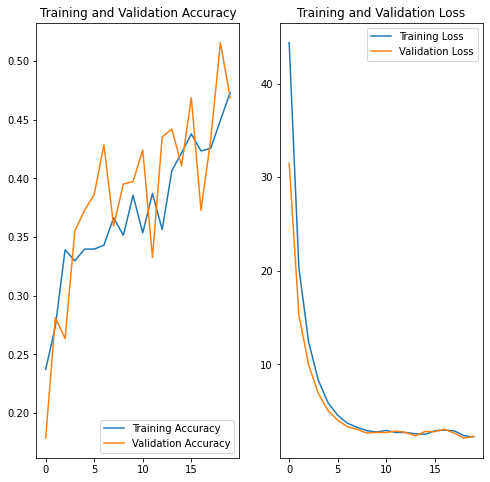

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [19]:
from glob import glob

for i in class_names:
  sample_dir = data_dir_train / i
  os.chdir(sample_dir)
  sample_num = len(glob('*'))
  os.chdir('../..')
  print(i + " has " + str(sample_num) + " samples.")


actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 464 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - 1. Which class has the least number of samples?
       A. seborrheic keratosis has least number of samples with 77.
#### - Which classes dominate the data in terms proportionate number of samples?
       A. pigmented benign keratosis has the higher proportion of samples with 464.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= pathlib.Path("/content/gdrive/MyDrive/CNN melanoma aug/Train")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCAC7C6B50>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD0BFAE890>: 100%|██████████| 500/500 [00:19<00:00, 25.95 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD0BFA9B50>: 100%|██████████| 500/500 [00:21<00:00, 23.64 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FDCBE19FD90>: 100%|██████████| 500/500 [01:21<00:00,  6.10 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FDC1A555390>: 100%|██████████| 500/500 [01:27<00:00,  5.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD0C0173D0>: 100%|██████████| 500/500 [00:20<00:00, 24.94 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDCBE1CB950>: 100%|██████████| 500/500 [00:40<00:00, 12.35 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD0C5C1190>: 100%|██████████| 500/500 [00:20<00:00, 24.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD0C5BDA50>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train_aug = pathlib.Path("/content/gdrive/MyDrive/CNN melanoma aug/Train")

image_count_train = len(list(data_dir_train_aug.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0030882.jpg_054e4eb6-f2b8-4e23-b477-9cef5c66b448.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0025599.jpg_b3e7bdf3-2bdc-46ef-a716-5de39fda9128.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0033762.jpg_da52eec4-91f4-4f5d-880b-2f994a27b7c5.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0031759.jpg_0c624275-5bfd-4349-885e-872bbc2f5996.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0029099.jpg_632ed016-6406-4ee6-b20b-d18870de30b0.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular lesion/output/vascular lesion_original_ISIC_0027269.jpg_58572778-bb7f-4b75-bcc3-ad4d8159c8d6.jpg',
 '/content/gdrive/MyDrive/CNN melanoma aug/Train/vascular 

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

dermatofibroma                500
seborrheic keratosis          500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape = (img_height, img_width, 3)))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512,kernel_regularizer=l2(0.01)))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 115s 656ms/step - loss: 24.6976 - accuracy: 0.1966 - val_loss: 9.7425 - val_accuracy: 0.1730
Epoch 2/50
169/169 [==============================] - 42s 244ms/step - loss: 6.4675 - accuracy: 0.2049 - val_loss: 4.4252 - val_accuracy: 0.2294
Epoch 3/50
169/169 [==============================] - 42s 243ms/step - loss: 3.8327 - accuracy: 0.2083 - val_loss: 3.2556 - val_accuracy: 0.2784
Epoch 4/50
169/169 [==============================] - 42s 242ms/step - loss: 3.2889 - accuracy: 0.2405 - val_loss: 3.5716 - val_accuracy: 0.2331
Epoch 5/50
169/169 [==============================] - 42s 244ms/step - loss: 3.1309 - accuracy: 0.2635 - val_loss: 2.6708 - val_accuracy: 0.3096
Epoch 6/50
169/169 [==============================] - 42s 245ms/step - loss: 2.6708 - accuracy: 0.2910 - val_loss: 2.3337 - val_accuracy: 0.3356
Epoch 7/50
169/169 [==============================] - 42s 245ms/step - loss: 2.5473 - accuracy: 0.3021 - val_loss: 2.4819 - val_

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
#@markdown The overfitting has been reduced to a greated extent as the training accuracy is of 80% and the validation accuracy has reached 72% with minimal loss. This model can be further modified by using pretrained models like resnet and the accuracy can be greatly increased.